# **Data Scraping Code Appendix**

In this notebook we will scrape the Glassdoor website using the following scraping tools:

Bright Data Scarping Browser, Selenium, BeautifulSoup.

In [ ]:
!pip install selenium

In [ ]:
from selenium.webdriver.chromium.remote_connection import ChromiumRemoteConnection
from selenium.webdriver import Remote, ChromeOptions
from matplotlib import pyplot as plt
from selenium import webdriver
from bs4 import BeautifulSoup
import pandas as pd
import string
import random
import time

## **Data Scraping**

Let us write a function which takes a job title as an input, scrapes the Glassdoor website, and saves the scraped salaries as a CSV file:

In [ ]:
# please enter Bright Data Scraping Browser key below
brightdata_sb_key = "Enter Bright Data Scarping Browser key"

In [ ]:
def scrape_salaries(job_title):

    lst = list()
    salary_dict = {}

    # job title's listing in the US on the Glassdoor website
    target_url = f"https://www.glassdoor.com/Job/united-states-{job_title.replace('_', '-')}-jobs-SRCH_IL.0,13_IN1_KO14,{14+len(job_title)}.htm"

    # Bright Data Scraping Browser
    SBR_WEBDRIVER = brightdata_sb_key

    # scrape the tagert url
    sbr_connection = ChromiumRemoteConnection(SBR_WEBDRIVER, 'goog', 'chrome')
    with Remote(sbr_connection, options=ChromeOptions()) as driver:
        driver.get(target_url)

        time.sleep(random.uniform(1, 10))

        resp = driver.page_source

        time.sleep(random.uniform(3, 5))

        soup=BeautifulSoup(resp,'html.parser')

        allJobsContainer = soup.find("ul",{"class":"JobsList_jobsList__lqjTr"})

        # get all visiable job listings
        allJobs = allJobsContainer.find_all("li")

        # get the salary from the listings
        for job in allJobs:

          try:
            salary_dict["salary"]=job.find("div",{"class":"JobCard_salaryEstimate__arV5J"}).text

          except:
              salary_dict["salary"]=None

          lst.append(salary_dict)

          salary_dict={}

    # save the scrapted salaries as a csv file
    df = pd.DataFrame(lst)
    df.to_csv(f"{job_title}.csv", index=False, encoding='utf-8')

As we can see, our function is highly general as it takes only the desired job title as an input (e.g. no need to enter a specific URL, customize the scapring process to the specific page, etc.). This property is a key factor when scapring big data, and it allows for a scalable scraping process.

For example, given a CSV with job titles, we can simply load it and run the code above for each job title, to scarpe the wanted salaries from the Glassdoor website (nothing has to be done manually).

Let us define the job titles we are going to scrape for each group (as described in the report):

(*) We entered them manually since their number is quite low.

In [ ]:
management_and_leadership_scraping = ["manager", "project_manager", "ceo"]

healthcare_and_medical_scraping = ["registered_nurse", "hospital_and_health_care_professional", "physician"]

education_and_teaching_scraping = ["teacher", "principal", "professor"]

business_and_administration_scraping = ["office_manager", "administrative_assistant", "realtor"]

legal_and_law_scraping = ["attorney", "paralegal", "legal_assistant"]

technology_and_engineering_scraping = ["software_engineer", "information_technology_and_services_professional", "electrician"]

creative_and_artistic_scraping = ["graphic_designer", "photographer", "content_writer"]

financial_and_accounting_scraping = ["accountant", "controller", "bookkeeper"]

customer_service_and_sales_scraping = ["account_manager", "sales_manager", "sales_associate"]

nonprofit_and_social_services_scraping = ["pastor", "social_worker", "program_coordinator"]

scraping_groups = [('Management and Leadership', management_and_leadership_scraping),
                   ('Healthcare and Medical', healthcare_and_medical_scraping),
                   ('Education and Teaching', education_and_teaching_scraping),
                   ('Business and Administration', business_and_administration_scraping),
                   ('Legal and Law', legal_and_law_scraping),
                   ('Technology and Engineering', technology_and_engineering_scraping),
                   ('Creative and Artistic', creative_and_artistic_scraping),
                   ('Financial and Accounting', financial_and_accounting_scraping),
                   ('Customer Service and Sales', customer_service_and_sales_scraping),
                   ('Nonprofit and Social Services', nonprofit_and_social_services_scraping)]


Now, let us scarpe the salaries for each of the job titels mentioned above:

In [ ]:
for _, group_scraping in scraping_groups:
  for job_title in group_scraping:
    # create csv file of the scraped job title's salaries
    scrape_salaries(job_title)

    # wait between each scraping
    time.sleep(random.uniform(5, 10))

## **Data Processing**

After finishing the scraping phase, let us drop null values and check the total number of valid items scraped:

In [ ]:
total_valid_records_num = 0
for _, group_scarping in scraping_groups:
  for job_title in group_scarping:

    # read the csv file
    job_title_salary_df = pd.read_csv(f"{job_title}.csv")

    # remove null values
    job_title_salary_df = job_title_salary_df.dropna()

    # get the number of valid records scapred for eacg job title
    job_title_valid_records_num = len(job_title_salary_df)
    total_valid_records_num += job_title_valid_records_num

print(f"Total number of valid records scraped: {total_valid_records_num}")

Total number of valid records scraped: 757


As we can see, the total number of valid items indeed meets our threshold (as mentioned in the report).

Let us display the dimensionality of the dataframes scraped for each job title:

In [ ]:
def standardize_job_title(job_title):
  if job_title == "ceo":
    return "CEO"

  job_title_lst = job_title.split("_")

  for i, w in enumerate(job_title_lst):

    if w == "and":
      continue

    job_title_lst[i] = string.capwords(w)

  job_title_standardized = " ".join(job_title_lst)
  return job_title_standardized

In [ ]:
for group_name, group_scarping in scraping_groups:
  print(f"-------{group_name}-------\n")
  for job_title in group_scarping:

    # read the csv file
    job_title_salary_df = pd.read_csv(f"{job_title}.csv")

    # remove null values
    job_title_salary_df = job_title_salary_df.dropna()

    # get the number of valid records scapred for eacg job title
    job_title_valid_records_num = len(job_title_salary_df)

    print(f"{standardize_job_title(job_title)} dataframe dimensionality:")
    print("Number of columns: 1")
    print(f"Number of rows: {job_title_valid_records_num}\n")

-------Management and Leadership-------

Manager dataframe dimensionality:
Number of columns: 1
Number of rows: 30

Project Manager dataframe dimensionality:
Number of columns: 1
Number of rows: 22

CEO dataframe dimensionality:
Number of columns: 1
Number of rows: 22

-------Healthcare and Medical-------

Registered Nurse dataframe dimensionality:
Number of columns: 1
Number of rows: 27

Hospital and Health Care Professional dataframe dimensionality:
Number of columns: 1
Number of rows: 26

Physician dataframe dimensionality:
Number of columns: 1
Number of rows: 27

-------Education and Teaching-------

Teacher dataframe dimensionality:
Number of columns: 1
Number of rows: 29

Principal dataframe dimensionality:
Number of columns: 1
Number of rows: 30

Professor dataframe dimensionality:
Number of columns: 1
Number of rows: 26

-------Business and Administration-------

Office Manager dataframe dimensionality:
Number of columns: 1
Number of rows: 24

Administrative Assistant dataframe

Let us be remainded during the scarping phase we collected raw salary date (cannot perform calculations on it). In order to find the desired values (estimated job titles and groups salaries), we first need to clean the gatherd data.

Now, let us execute the following steps:

1. clean the raw data (cannot perform calculations with it).

2. calculate the estiamted job titles and group salaries.

3. create the final dataframes.

In [ ]:
def clean_salary(salary_str):
  salary_str = str.lower(salary_str)\
                  .replace("(employer est.)", "")\
                  .replace("(glassdoor est.)", "")\
                  .replace("k", "")\
                  .replace("$", "")

  hourly_rate_flag = False

  if "per hour" in salary_str:
    salary_str = salary_str.replace("per hour", "")\
                           .replace(" ", "")
    hourly_rate_flag = True

  salary_range = salary_str.split("-")

  if len(salary_range) > 1:
    salary = (float(salary_range[0]) + float(salary_range[1])) / 2

  else:
    salary = float(salary_range[0])

  if hourly_rate_flag:
    salary = (salary * 2080) / 1000

  return salary

In [ ]:
job_salaries_dict = {}
group_salaries_dict = {}

for group_name, group_scarping in scraping_groups:
  group_total = 0
  for job_title in group_scarping:

    # read the csv file
    job_salary_df = pd.read_csv(f"{job_title}.csv")

    # remove null values
    job_salary_df = job_salary_df.dropna()

    # clean the salary column (so that it contain the salary in float type)
    job_salary_df["salary"] = job_salary_df["salary"].apply(clean_salary)

    # find the job title's average salary
    job_title_avg_salary = job_salary_df["salary"].mean()
    job_salaries_dict[standardize_job_title(job_title)] = round(job_title_avg_salary)
    group_total += job_title_avg_salary

  group_avg = group_total / 3
  group_salaries_dict[group_name] = round(group_avg)

# create the final dfs
job_salaries_df = pd.DataFrame.from_dict(job_salaries_dict, orient="index", columns=["estimated_salary"])
group_salaries_df = pd.DataFrame.from_dict(group_salaries_dict, orient="index", columns=["estimated_salary"])

## **Visualizing the Results**

Now, that we have our final dataframes in hand, let us visualize the results.

In [ ]:
def create_barh(df, figsize, title, text_offset):
  df = df.sort_values("estimated_salary", ascending=True)

  idxs = df.index.to_list()
  values = [x[0] for x in df.values.tolist()]

  plt.style.use("ggplot")
  plt.figure(figsize=figsize)
  plt.barh(idxs, values, color="cornflowerblue", linewidth=0.5, edgecolor="black")

  for i in range(len(values)):
      plt.text(values[i] + text_offset, i-0.1, str(values[i]) + "K", ha='center', fontweight="bold")

  plt.xlabel("estimated salary [annual income in $]")
  plt.title(f"Estimated {title} Salaries (Data Scraped)")
  plt.show()

### Estimated Job Salaries

In [ ]:
display(job_salaries_df)

,estimated_salary
Manager,101
Project Manager,104
CEO,127
Registered Nurse,97
Hospital and Health Care Professional,98
Physician,266
Teacher,50
Principal,82
Professor,95
Office Manager,60


As we can see, the dataframe dimensionality is:

*   A single column (estimated job title salary as annual income in dollars).
*   30 rows (one for each job title).

Now, let us visualize the results using a horizontal bar plot:

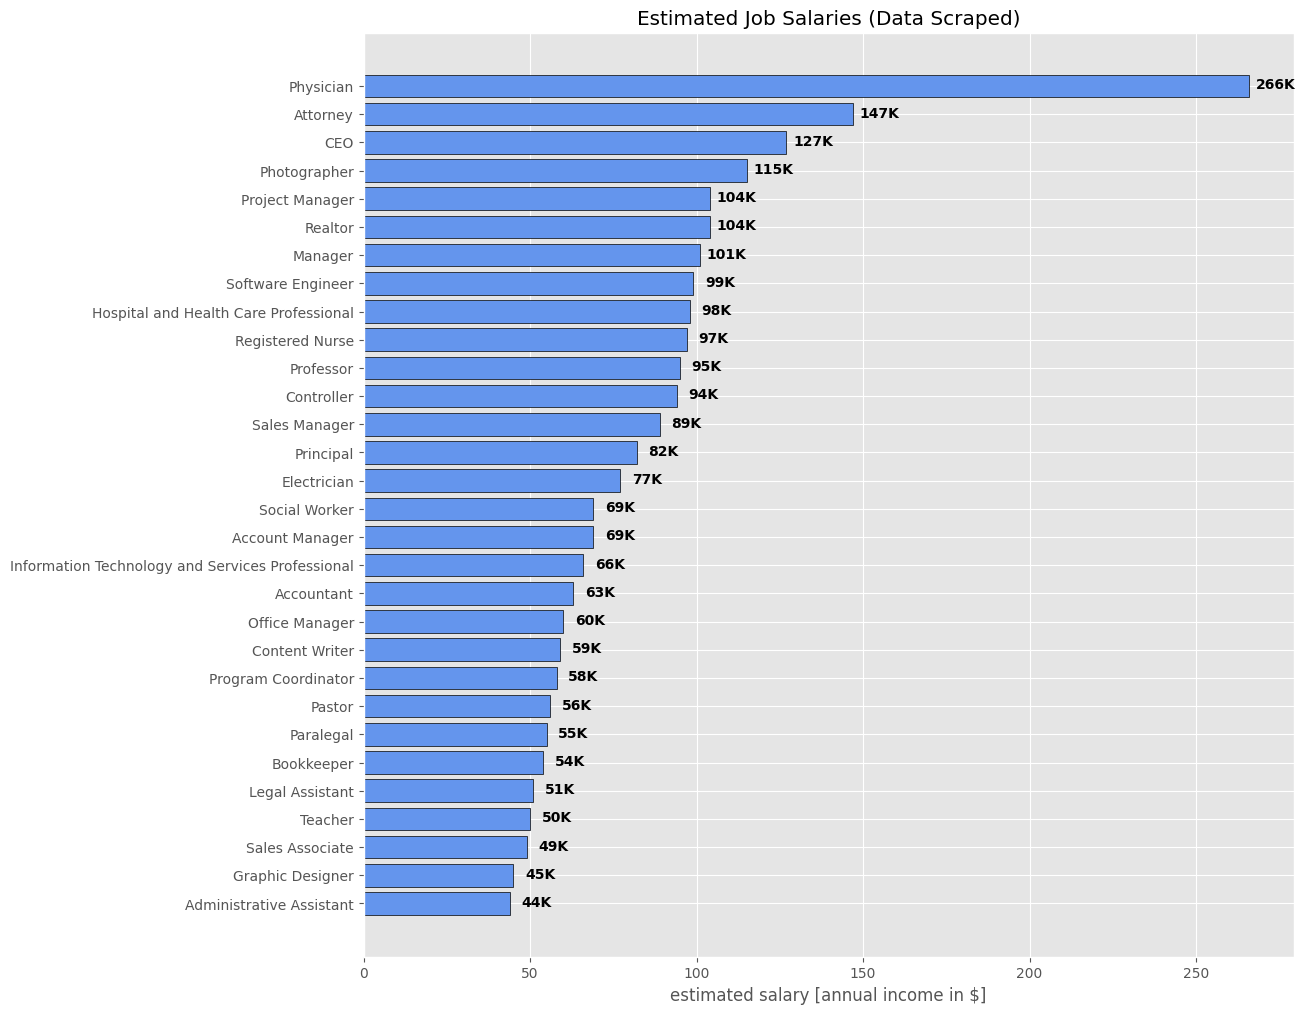

In [ ]:
create_barh(job_salaries_df, figsize=(12, 12), title="Job", text_offset=8)

### Estimated Carrer Path Salaries

In [ ]:
display(group_salaries_df)

,estimated_salary
Management and Leadership,111
Healthcare and Medical,153
Education and Teaching,76
Business and Administration,69
Legal and Law,84
Technology and Engineering,81
Creative and Artistic,73
Financial and Accounting,70
Customer Service and Sales,69
Nonprofit and Social Services,61


As we can see, the dataframe dimensionality is:

*   A single column (estimated group salary as annual income in dollars).
*   10 rows (one for each group).



Now, let us visualize the estiamted group salaries using a horizontal bar plot:

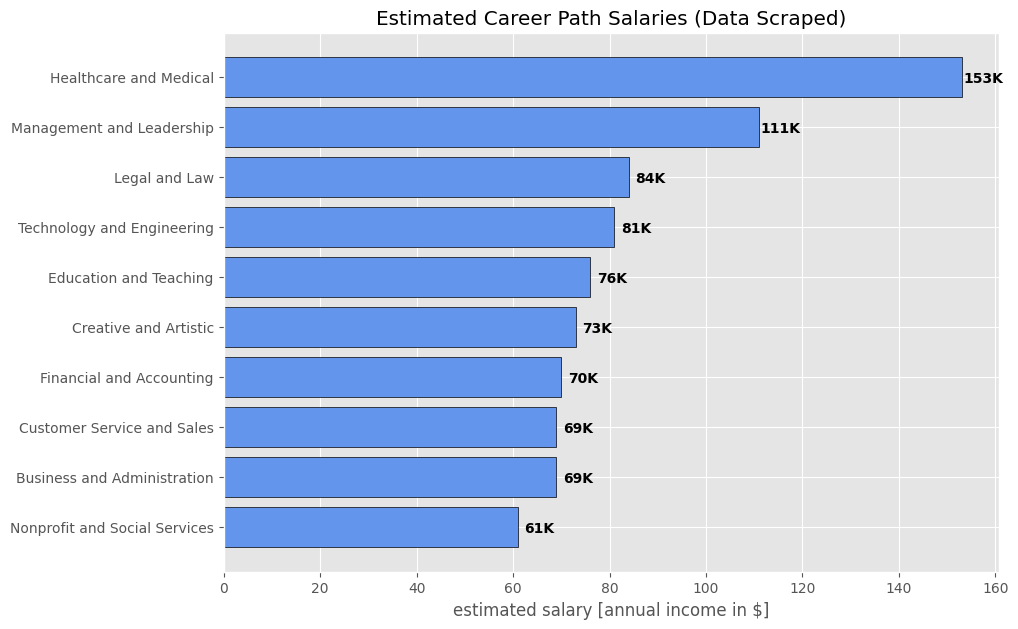

In [ ]:
create_barh(group_salaries_df, figsize=(10, 7), title="Career Path", text_offset=4.5)

## **Saving the Results**

Lastly, let us save the final dataframes as CSV files:

In [ ]:
job_salaries_df.to_csv("estimated_job_salaries.csv", index_label="job_title")
group_salaries_df.to_csv("estimated_group_salaries.csv", index_label="group")